In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('https://github.com/lilaceri/Working-with-data-/blob/342abab10d93c4bf23b5c55a50f189f12a137c5f/Data%20Sets%20for%20code%20divisio/Covid%20Vaccination%20Data.xlsx?raw=true')

LABEL_TOTAL_VAC = "total_vaccinations"
LABEL_COUNTRY = "country"
COUNTRY_UK = "United Kingdom"

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14994 entries, 0 to 14993
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              14994 non-null  object        
 1   iso_code                             14994 non-null  object        
 2   date                                 14994 non-null  datetime64[ns]
 3   total_vaccinations                   9011 non-null   float64       
 4   people_vaccinated                    8370 non-null   float64       
 5   people_fully_vaccinated              6158 non-null   float64       
 6   daily_vaccinations_raw               7575 non-null   float64       
 7   daily_vaccinations                   14796 non-null  float64       
 8   total_vaccinations_per_hundred       9011 non-null   float64       
 9   people_vaccinated_per_hundred        8370 non-null   float64       
 10  people_ful

In [2]:
df["date"] = pd.to_datetime(df["date"])
df.sort_values(by="date", ascending=False)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
14993,Zimbabwe,ZWE,2021-05-02,524199.0,430068.0,94131.0,3900.0,19169.0,3.53,2.89,0.63,1290.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1388935941...
3064,Cote d'Ivoire,CIV,2021-05-02,163176.0,163176.0,NaN,4195.0,6329.0,0.62,0.62,NaN,240.0,Oxford/AstraZeneca,Ministry of Health and Public Hygiene,https://www.facebook.com/mshpcmu/posts/1892402...
11582,Rwanda,RWA,2021-05-02,350131.0,350131.0,NaN,128.0,46.0,2.70,2.70,NaN,4.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://twitter.com/RwandaHealth/status/138893...
13001,South Korea,KOR,2021-05-02,3633353.0,3396864.0,236489.0,2061.0,180223.0,7.09,6.63,0.46,3515.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Korea Centers for Disease Control and Prevention,http://ncv.kdca.go.kr/
5982,Hungary,HUN,2021-05-02,6150309.0,4073149.0,2077160.0,69755.0,125906.0,63.67,42.16,21.50,13033.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Government of Hungary,https://koronavirus.gov.hu/cikkek/4-millio-73-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2264,Canada,CAN,2020-12-16,3023.0,NaN,NaN,2300.0,1509.0,0.01,NaN,NaN,40.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Official data from provinces via covid19tracke...,https://covid19tracker.ca/vaccinationtracker.html
2664,China,CHN,2020-12-15,1500000.0,NaN,NaN,NaN,NaN,0.10,NaN,NaN,NaN,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,http://www.nhc.gov.cn/xcs/yqjzqk/202105/a7bed5...
2263,Canada,CAN,2020-12-15,723.0,NaN,NaN,718.0,718.0,0.00,NaN,NaN,19.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Official data from provinces via covid19tracke...,https://covid19tracker.ca/vaccinationtracker.html
11367,Russia,RUS,2020-12-15,28500.0,28500.0,NaN,NaN,NaN,0.02,0.02,NaN,NaN,"EpiVacCorona, Sputnik V",Official data from local governments via gogov.ru,https://gogov.ru/articles/covid-v-stats


In [31]:
df_grouped = df.groupby([LABEL_COUNTRY])
df_dates = df_grouped.agg(min_date=("date", np.min), max_date=("date", np.max), max_vaccinations_per_hundred=("total_vaccinations_per_hundred", np.max))
display(df_dates)

,min_date,max_date,max_vaccinations_per_hundred
country,,,
Afghanistan,2021-02-22,2021-04-22,0.62
Albania,2021-01-10,2021-05-01,17.17
Algeria,2021-01-29,2021-02-19,0.17
Andorra,2021-01-25,2021-04-19,34.19
Angola,2021-03-01,2021-04-23,1.39
...,...,...,...
Venezuela,2021-02-17,2021-04-12,0.88
Vietnam,2021-03-07,2021-04-29,0.52
Wales,2021-01-03,2021-05-01,83.24


In [34]:
# 50th Percentile
def q50(x):
    return x.quantile(0.5)

# 90th Percentile
def q90(x):
    return x.quantile(0.9)

df.groupby([LABEL_COUNTRY]).agg({"total_vaccinations_per_hundred": [q50, q90, 'max']})

total_vaccinations_per_hundred               
                                       q50     q90    max
country                                                  
Afghanistan                          0.140   0.496   0.62
Albania                              3.430  13.930  17.17
Algeria                              0.000   0.136   0.17
Andorra                              5.515  23.395  34.19
Angola                               0.400   1.238   1.39
...                                    ...     ...    ...
Venezuela                            0.045   0.610   0.88
Vietnam                              0.050   0.194   0.52
Wales                               37.490  74.060  83.24
Zambia                               0.050   0.140   0.17
Zimbabwe                             0.530   2.620   3.53

[195 rows x 3 columns]

In [35]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

df.groupby([LABEL_COUNTRY]).agg([np.sum, np.mean, np.std, np.median, np.var, np.min, np.max, percentile(50), percentile(95)]) 

total_vaccinations                                          \
                           sum          mean            std     median   
country                                                                  
Afghanistan           422200.0  8.444000e+04   99162.331558    54000.0   
Albania              9683918.0  1.613986e+05  162746.934533    98660.5   
Algeria                75030.0  2.501000e+04   43292.612534       30.0   
Andorra               128036.0  8.002250e+03    7883.866974     4262.5   
Angola               1551757.0  1.724174e+05  164849.384388   130750.0   
...                        ...           ...            ...        ...   
Venezuela             374574.0  6.242900e+04   99066.373476    13208.5   
Vietnam              4229719.0  7.832813e+04   99431.637601    52213.0   
Wales              141312090.0  1.273082e+06  771821.331626  1182035.0   
Zambia                123021.0  1.118373e+04   11356.781244     9006.0   
Zimbabwe            11065412.0  1.558509e+05  155267.049539    79139.0   

                                                                           \
                      var     amin       amax percentile_50 percentile_95   
country                                                                     
Afghanistan  9.833168e+09      0.0   240000.0           NaN           NaN   
Albania      2.648656e+10      0.0   494028.0           NaN           NaN   
Algeria      1.874250e+09      0.0    75000.0           NaN           NaN   
Andorra      6.215536e+07    576.0    26414.0           NaN           NaN   
Angola       2.717532e+10      0.0   456349.0           NaN           NaN   
...                   ...      ...        ...           ...           ...   
Venezuela    9.814146e+09      0.0   250000.0           NaN           NaN   
Vietnam      9.886651e+09      0.0   506435.0       52213.0      280405.6   
Wales        5.957082e+11  50783.0  2624406.0           NaN           NaN   
Zambia       1.289765e+08      0.0    32034.0           NaN           NaN   
Zimbabwe     2.410786e+10      0.0   524199.0           NaN           NaN   

            people_vaccinated  ... people_fully_vaccinated_per_hundred  \
                          sum  ...                       percentile_95   
country                        ...                                       
Afghanistan          422200.0  ...                                 NaN   
Albania               14501.0  ...                                 NaN   
Algeria                   0.0  ...                                 NaN   
Andorra               53757.0  ...                                 NaN   
Angola              1551757.0  ...                                 NaN   
...                       ...  ...                                 ...   
Venezuela            374574.0  ...                                 NaN   
Vietnam             4229719.0  ...                                 NaN   
Wales             113253031.0  ...                                 NaN   
Zambia               123021.0  ...                                 NaN   
Zimbabwe            9656181.0  ...                                 NaN   

            daily_vaccinations_per_million                                    \
                                       sum         mean          std  median   
country                                                                        
Afghanistan                         5663.0    95.983051    54.673164    77.0   
Albania                           153332.0  1381.369369  1770.916152   352.0   
Algeria                             1568.0    74.666667    20.492275    85.0   
Andorra                           296215.0  3526.369048  3671.024750  1902.5   
Angola                             12533.0   236.471698   169.718160   204.0   
...                                    ...          ...          ...     ...   
Venezuela                           7190.0   133.148148   198.346125    22.5   
Vietnam                             3093.0    58.358491   1

In [4]:
def aggregate(df, column_name, country_name, filtering):
    df_clean = df.dropna(subset=[column_name])
    df_grouped = df_clean.groupby(["country"], as_index=False)
    df_agg = df_grouped.agg(value=(column_name, filtering))
    df_agg.rename(columns={"value":column_name}, inplace=True)

    return df_agg.sort_values(column_name, ascending=False)


df_agg = aggregate(df, "daily_vaccinations_per_million", "United Kingdom", np.max)
display(df_agg.head())

,country,daily_vaccinations_per_million
20,Bhutan,118759.0
53,Falkland Islands,54264.0
62,Gibraltar,31700.0
151,Seychelles,24415.0
8,Aruba,23350.0


In [5]:
def filter_by_boundary(df, column_name, boundary):
    condition = df[column_name] > boundary
    df_filtered = df.loc[condition]
    return df_filtered.sort_values(column_name, ascending=False)


boundary = df["daily_vaccinations_per_million"].mean()
display(boundary)
df_filtered = filter_by_boundary(df_agg, "daily_vaccinations_per_million", boundary)
display(df_filtered)

2972.163625304136

,country,daily_vaccinations_per_million
20,Bhutan,118759.0
53,Falkland Islands,54264.0
62,Gibraltar,31700.0
151,Seychelles,24415.0
8,Aruba,23350.0
...,...,...
110,Montenegro,3525.0
18,Belize,3415.0
35,Costa Rica,3381.0
98,Macao,3182.0


In [6]:
def country_list_above_rate(df, column_name, country_name, filtering):
    df_clean = df.dropna(subset=[column_name])
    df_grouped = df_clean.groupby(["country"])
    df_rates = df_grouped.agg(value=(column_name, filtering))
    df_sorted = df_rates.sort_values("value", ascending=False).reset_index()
    # display(df_rates)

    country_list = list(df_sorted["country"])
    country_index = country_list.index(country_name)
    list_above = country_list[:country_index]
    list_above.sort()
    print(f"There are {len(list_above)} countries with a rate of {column_name.replace('_', ' ')} above the {country_name}.")

    return list_above

display(country_list_above_rate(df, "total_vaccinations_per_hundred", "United Kingdom", np.max))

There are 19 countries with a rate of total vaccinations per hundred above the United Kingdom.


['Bahrain',
 'Bermuda',
 'Cayman Islands',
 'Chile',
 'England',
 'Falkland Islands',
 'Gibraltar',
 'Isle of Man',
 'Israel',
 'Jersey',
 'Maldives',
 'Malta',
 'Saint Helena',
 'San Marino',
 'Scotland',
 'Seychelles',
 'United Arab Emirates',
 'United States',
 'Wales']

Display the countries for which total vaccinated is at the same rate or more than the UK

```
array(['Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
    'Belgium', 'Brazil', 'Cambodia', 'Canada', 'Chile', 'China',
    'Colombia', 'Czechia', 'Denmark', 'Dominican Republic', 'England',
    'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Hungary',
    'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan',
    'Kazakhstan', 'Malaysia', 'Mexico', 'Morocco', 'Nepal',
    'Netherlands', 'Norway', 'Pakistan', 'Peru', 'Philippines',
    'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Saudi Arabia',
    'Scotland', 'Serbia', 'Singapore', 'Slovakia', 'South Korea',
    'Spain', 'Sweden', 'Switzerland', 'Thailand', 'Turkey',
    'United Arab Emirates', 'United Kingdom', 'United States',
    'Uruguay', 'Wales'], dtype=object)
```

In [7]:
EXPECTED = ['Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
    'Belgium', 'Brazil', 'Cambodia', 'Canada', 'Chile', 'China',
    'Colombia', 'Czechia', 'Denmark', 'Dominican Republic', 'England',
    'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Hungary',
    'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan',
    'Kazakhstan', 'Malaysia', 'Mexico', 'Morocco', 'Nepal',
    'Netherlands', 'Norway', 'Pakistan', 'Peru', 'Philippines',
    'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Saudi Arabia',
    'Scotland', 'Serbia', 'Singapore', 'Slovakia', 'South Korea',
    'Spain', 'Sweden', 'Switzerland', 'Thailand', 'Turkey',
    'United Arab Emirates', 'United Kingdom', 'United States',
    'Uruguay', 'Wales']
len(EXPECTED)

59

In [8]:
cond_1 = df["country"] == "Argentina"
cond_2 = df["country"] == "United Kingdom"
df_filtered = df.loc[cond_1 | cond_2]
df_filtered.dropna(subset=["total_vaccinations", "people_vaccinated", "people_fully_vaccinated", 
                           "daily_vaccinations_raw", "daily_vaccinations", "total_vaccinations_per_hundred",
                           "people_vaccinated_per_hundred", "people_fully_vaccinated_per_hundred", "daily_vaccinations_per_million"])

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
500,Argentina,ARG,2021-01-21,265724.0,249372.0,16352.0,17791.0,11704.0,0.59,0.55,0.04,259.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
501,Argentina,ARG,2021-01-22,279602.0,254456.0,25146.0,13878.0,11263.0,0.62,0.56,0.06,249.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
502,Argentina,ARG,2021-01-23,288064.0,258876.0,29188.0,8462.0,11124.0,0.64,0.57,0.06,246.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
503,Argentina,ARG,2021-01-24,292023.0,260036.0,31987.0,3959.0,10342.0,0.65,0.58,0.07,229.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
504,Argentina,ARG,2021-01-25,292386.0,260122.0,32264.0,363.0,9046.0,0.65,0.58,0.07,200.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14443,United Kingdom,GBR,2021-04-27,47540984.0,33959908.0,13581076.0,495593.0,517918.0,70.03,50.02,20.01,7629.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
14444,United Kingdom,GBR,2021-04-28,48138009.0,34094048.0,14043961.0,597025.0,526822.0,70.91,50.22,20.69,7760.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
14445,United Kingdom,GBR,2021-04-29,48752144.0,34216616.0,14535528.0,614135.0,534262.0,71.81,50.40,21.41,7870.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
14446,United Kingdom,GBR,2021-04-30,49319518.0,34362205.0,14957313.0,567374.0,529487.0,72.65,50.62,22.03,7800.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


In [9]:
# clean dataset
df_total_vac = df.dropna(subset=[LABEL_TOTAL_VAC])
display(df_total_vac.head())

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,1367.0,0.02,0.02,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
22,Afghanistan,AFG,2021-03-16,54000.0,54000.0,NaN,NaN,2862.0,0.14,0.14,NaN,74.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
44,Afghanistan,AFG,2021-04-07,120000.0,120000.0,NaN,NaN,3000.0,0.31,0.31,NaN,77.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
59,Afghanistan,AFG,2021-04-22,240000.0,240000.0,NaN,NaN,8000.0,0.62,0.62,NaN,206.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...


In [10]:
df_total_vac.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [11]:
# Get the total vaccination over time for United Kingdom
df_uk_total_vac = df_total_vac[df_total_vac.country == COUNTRY_UK][LABEL_TOTAL_VAC].sum()
display(df_uk_total_vac)

2748464937.0

In [12]:
df_country = df_total_vac[[LABEL_COUNTRY,LABEL_TOTAL_VAC]].groupby(LABEL_COUNTRY).sum().reset_index()
display(df_country.head())


,country,total_vaccinations
0,Afghanistan,422200.0
1,Albania,9683918.0
2,Algeria,75030.0
3,Andorra,128036.0
4,Angola,1551757.0


In [13]:
df_country.describe()

,total_vaccinations
count,1.950000e+02
mean,2.294147e+08
std,1.088057e+09
min,4.000000e+02
25%,2.345700e+05
50%,3.906726e+06
75%,4.840737e+07
max,1.173897e+10


In [14]:
display(df_country[LABEL_TOTAL_VAC].mean())

229414704.56410256

In [15]:
# we have no column named country
display(df_country.columns)

Index(['country', 'total_vaccinations'], dtype='object')

In [16]:
def filter_countries_greater_than(df, column_name, country_name, value):
    # setup conditions
    condition_greater_than = df[column_name] >= value
    condition_not_country = df[LABEL_COUNTRY] != country_name
    # using the condition with .loc
    filtered = df_country.loc[condition_greater_than & condition_not_country]

    return list(filtered[LABEL_COUNTRY])

display(filter_countries_greater_than(df_country, LABEL_TOTAL_VAC, COUNTRY_UK, df_uk_total_vac))

['China', 'India', 'United States']

In [17]:
# df_vac_greater_than_uk = df_country[df_country["total_vaccinations"] >= df_uk_total_vac]
# df_vac_greater_than_uk = df_country[df_country["country"] != "United Kingdom"]
# df_vac_greater_than_uk = df_country[df_country["total_vaccinations"] >= df_uk_total_vac & df_country["country"] != "United Kingdom"]
# df_vac_greater_than_uk = df_country.query("total_vaccinations >= df_uk_total_vac & country != United Kingdom")
df_vac_greater_than_uk = df_country.loc[(df_country[LABEL_TOTAL_VAC] >= df_uk_total_vac) & (df_country[LABEL_COUNTRY] != COUNTRY_UK)]
display(list(df_vac_greater_than_uk[LABEL_COUNTRY]))

['China', 'India', 'United States']

In [18]:
def filter_by_mean(df, column_name):
    condition = df[column_name] > df[column_name].mean()
    filtered = df.loc[condition]
    filtered = filtered.sort_values(column_name, ascending=False)
    print(filtered.count())
    return filtered

df_above_mean = filter_by_mean(df_country, LABEL_TOTAL_VAC)

country               23
total_vaccinations    23
dtype: int64


In [19]:
def filter_by_quantile(df, column_name, percent):
    condition = df[column_name] > df[column_name].quantile(percent)
    filtered = df.loc[condition]
    filtered = filtered.sort_values(column_name, ascending=False)
    print(filtered.count())
    return filtered

df_above_low_perc = filter_by_quantile(df_country, LABEL_TOTAL_VAC, 0.25)

country               146
total_vaccinations    146
dtype: int64


In [20]:
def filter_by_median(df, column_name):
    condition = df[column_name] > df[column_name].median()
    filtered = df.loc[condition]
    filtered = filtered.sort_values(column_name, ascending=False)
    print(filtered.count())
    return filtered

df_above_median = filter_by_median(df_country, LABEL_TOTAL_VAC)    

country               97
total_vaccinations    97
dtype: int64


In [21]:
def get_index(df, column_name, country_name):
    country_list = list(df.sort_values(column_name, ascending=False)[LABEL_COUNTRY])
    return country_list.index(country_name)

index = get_index(df_above_median, LABEL_TOTAL_VAC, COUNTRY_UK)
index

3

In [22]:
"daily_vaccinations_per_million".replace("_", " ").title()

'Daily Vaccinations Per Million'

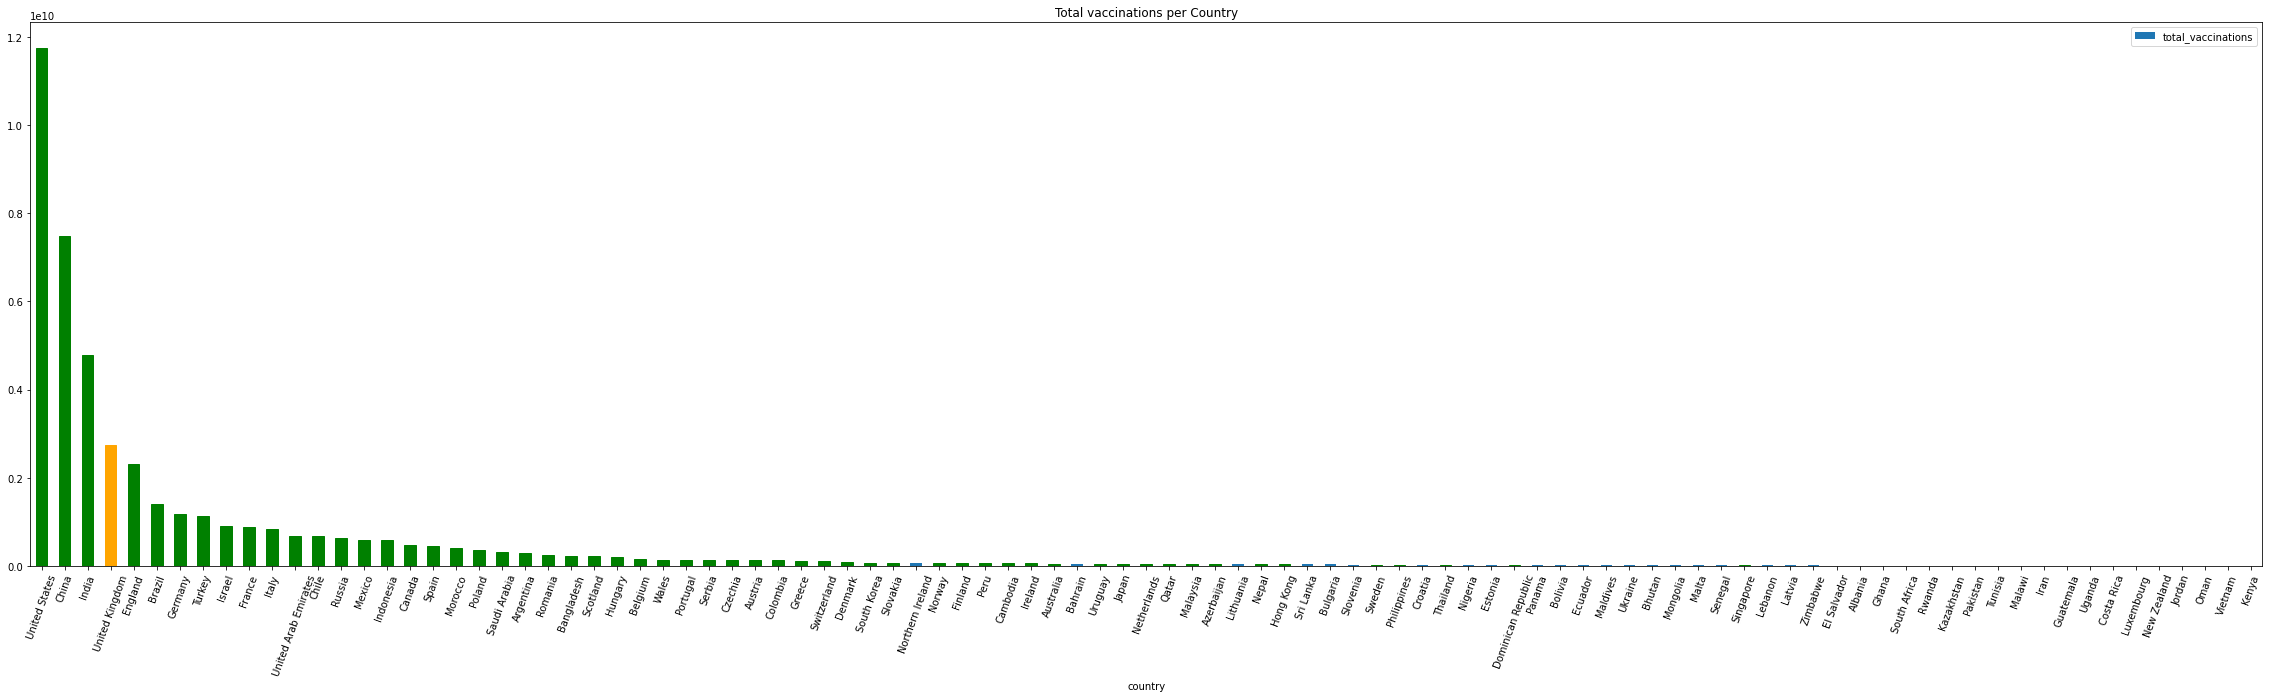

In [23]:
bchart = df_above_median.plot(
    kind="bar",
    x=LABEL_COUNTRY,
    y=LABEL_TOTAL_VAC,
    rot=70,
    title="Total vaccinations per Country", figsize=(40, 10))


def highlight_value(bchart, index, color):
    min_distance = float("inf")  # initialize min_distance with infinity
    index_of_bar_to_label = 0
    for i, rectangle in enumerate(bchart.patches):  # iterate over every bar
        tmp = abs(  # tmp = distance from middle of the bar to bar_value_to_label
            (rectangle.get_x() +
                (rectangle.get_width() * (1 / 2))) - index)
        if tmp < min_distance:  # we are searching for the bar with x cordinate
                                # closest to bar_value_to_label
            min_distance = tmp
            index_of_bar_to_label = i
    bchart.patches[index_of_bar_to_label].set_color(color)

for c in EXPECTED:
    i = get_index(df_above_median, LABEL_TOTAL_VAC, c)
    highlight_value(bchart, i, "green")

index = get_index(df_above_median, LABEL_TOTAL_VAC, COUNTRY_UK)
highlight_value(bchart, index, "orange")

plt.show(block=True)

In [24]:
LABEL_RATE = "total_vaccinations_per_hundred"

df_rate_vac = df.dropna(subset=[LABEL_RATE])
display(df_rate_vac.head())

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,1367.0,0.02,0.02,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
22,Afghanistan,AFG,2021-03-16,54000.0,54000.0,NaN,NaN,2862.0,0.14,0.14,NaN,74.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
44,Afghanistan,AFG,2021-04-07,120000.0,120000.0,NaN,NaN,3000.0,0.31,0.31,NaN,77.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
59,Afghanistan,AFG,2021-04-22,240000.0,240000.0,NaN,NaN,8000.0,0.62,0.62,NaN,206.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...


In [25]:
df_rates = df_total_vac[[LABEL_COUNTRY,LABEL_RATE]].groupby(LABEL_COUNTRY).max().reset_index()
display(df_rates.head())

,country,total_vaccinations_per_hundred
0,Afghanistan,0.62
1,Albania,17.17
2,Algeria,0.17
3,Andorra,34.19
4,Angola,1.39


In [26]:
df_rate_above_median = filter_by_median(df_rates, LABEL_RATE)  
df_rate_above_median

country                           97
total_vaccinations_per_hundred    97
dtype: int64


,country,total_vaccinations_per_hundred
66,Gibraltar,211.08
157,Seychelles,128.98
57,Falkland Islands,126.53
84,Israel,120.83
185,United Arab Emirates,107.53
...,...,...
148,Saint Lucia,13.30
149,Saint Vincent and the Grenadines,12.49
27,Bulgaria,11.87
78,India,11.17


In [27]:

index = get_index(df_rate_above_median, LABEL_RATE, COUNTRY_UK)
index

19

In [28]:
df_uk_total_vac = df_rate_above_median[df_total_vac.country == COUNTRY_UK][LABEL_TOTAL_VAC].sum()
display(df_uk_total_vac)

display(filter_countries_greater_than(df_rate_above_median, LABEL_RATE, COUNTRY_UK, df_uk_total_vac))

<ipython-input-28-ce03392dbd61>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_uk_total_vac = df_rate_above_median[df_total_vac.country == COUNTRY_UK][LABEL_TOTAL_VAC].sum()


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

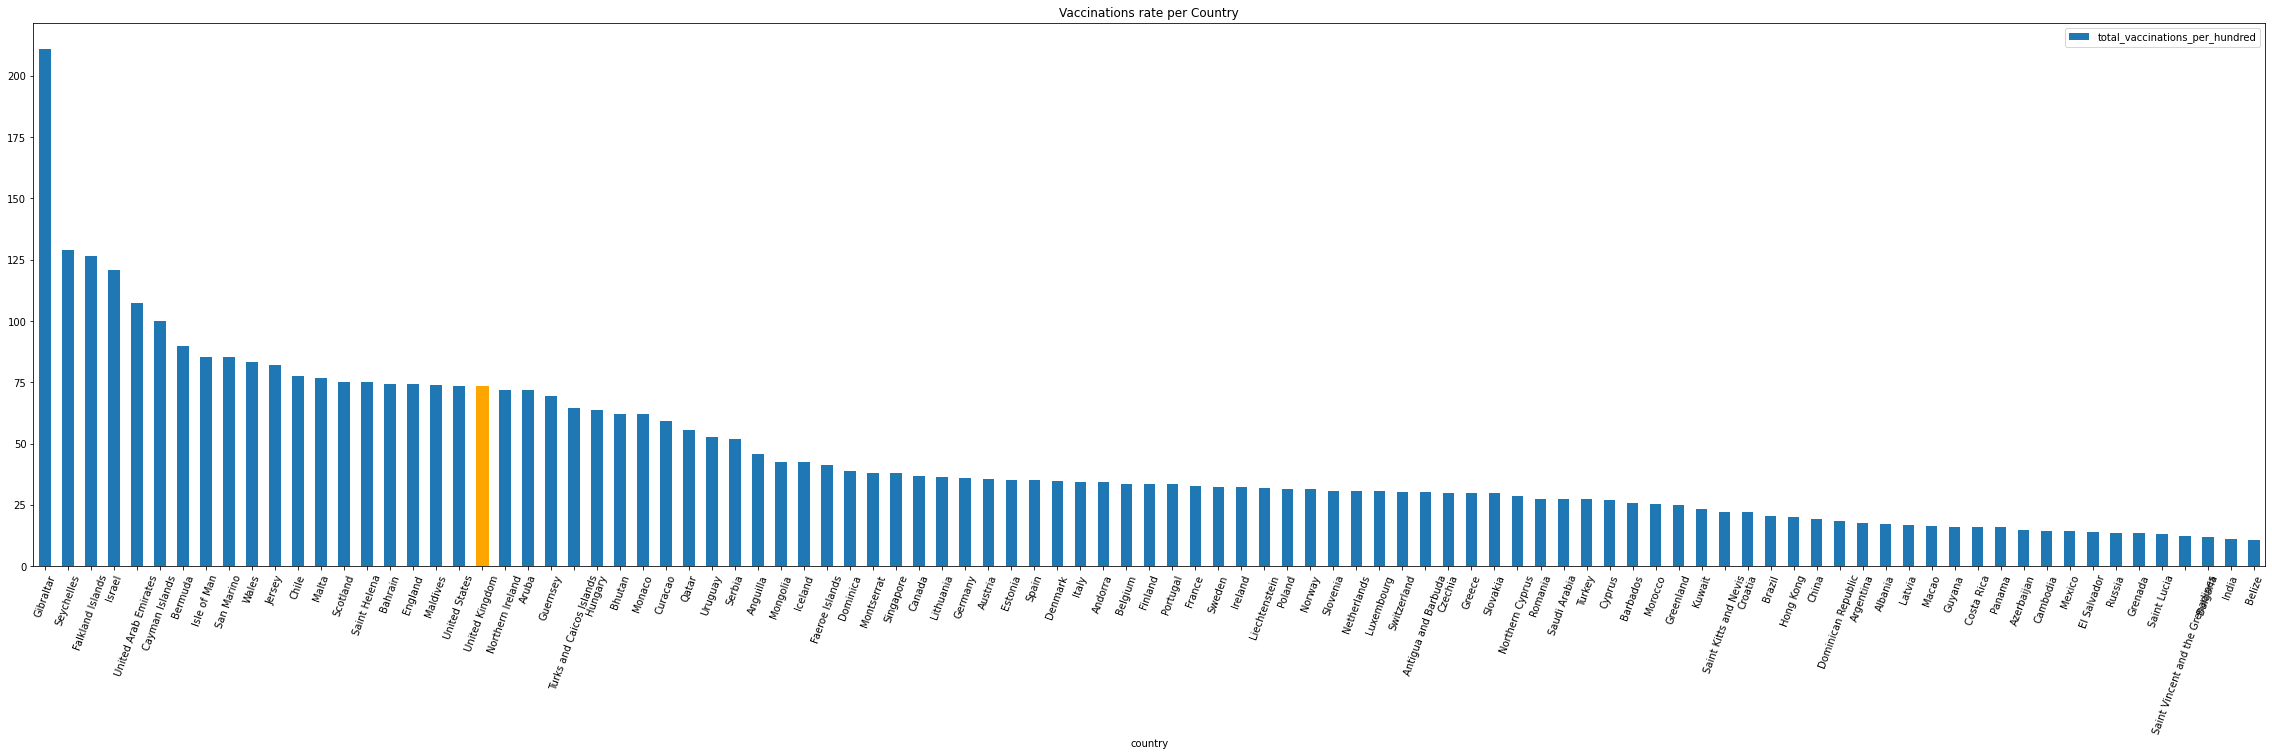

In [29]:
bchart = df_rate_above_median.plot(
    kind="bar",
    x=LABEL_COUNTRY,
    y=LABEL_RATE,
    rot=70,
    title="Vaccinations rate per Country", figsize=(40, 10))


def highlight_value(bchart, index):
    min_distance = float("inf")  # initialize min_distance with infinity
    index_of_bar_to_label = 0
    for i, rectangle in enumerate(bchart.patches):  # iterate over every bar
        tmp = abs(  # tmp = distance from middle of the bar to bar_value_to_label
            (rectangle.get_x() +
                (rectangle.get_width() * (1 / 2))) - index)
        if tmp < min_distance:  # we are searching for the bar with x cordinate
                                # closest to bar_value_to_label
            min_distance = tmp
            index_of_bar_to_label = i
    bchart.patches[index_of_bar_to_label].set_color("orange")

highlight_value(bchart, index)

plt.show(block=True)

# example of bar chart

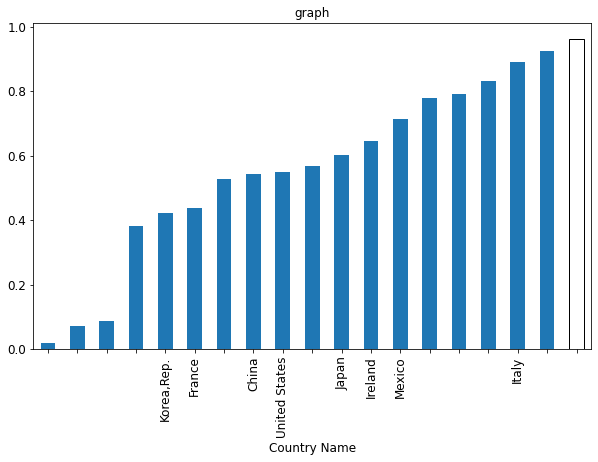

In [30]:
#Overall Country list
countries=['United States','Mexico','Japan','China','Korea,Rep.','Ireland','France','Italy','Czech Republic',
 'Austria',
 'Slovak Republic',
 'Slovenia',
 'Germany',
 'Portugal',
 'Hungary',
 'Colombia',
 'New Zealand',
 'Norway',
 'Latvia']

#Countries to highlight
desired=['United States','Mexico','Japan','China','Korea,Rep.','Ireland','France','Italy']

np.random.seed(0)
Value=np.random.rand(len(countries))
df_test = pd.DataFrame({'Countries': countries,'Value': Value,})
df_test.sort_values(['Value'],inplace=True)

df_test.set_index('Countries',drop=True,inplace=True)
ax_1 = df_test['Value'].plot(kind='bar', title ="graph", figsize=(10, 6), fontsize=12)
ax_1.set_xlabel("Country Name", fontsize=12)



for ticks in ax_1.xaxis.get_major_ticks():
    if ticks.label1.get_text() not in desired:
        ticks.label1.set_visible(False)
        ax_1.patches[df.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('w')
        ax_1.patches[df.index.get_indexer([ticks.label1.get_text()])[0]].set_edgecolor('black')
    else:
        ax_1.patches[df.index.get_indexer([ticks.label1.get_text()])[0]].set_facecolor('r')
        